In [1]:
import sys
sys.path.insert(1, '/Users/trongduong/Dropbox/URP project/Code/PQC_composer')

import qc_embedding
from qiskit.converters import circuit_to_dag

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector, Parameter

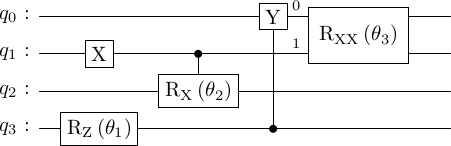

In [12]:
qc = QuantumCircuit(4)
theta1 = Parameter('θ_1')
theta2 = Parameter('θ_2')
theta3 = Parameter('θ_3')
qc.x(1)
qc.rz(theta1,3)
qc.crx(theta2,1,2)
qc.cy(3,0)
qc.rxx(theta3,0,1)

filename = '/Users/trongduong/Dropbox/research reports/quantumjournal plots/gate_based_circuit.pdf'
qc.draw(output='latex', filename=filename)

In [26]:
import numpy as np
import array_to_latex as a2l
A = np.array([[1.23456, 23.45678],[456.23, 8.239521]])
a2l.to_ltx(encoding, frmt = '{:6.2f}', arraytype = 'array')

\begin{array}
    0.00 &    0.00 &    0.00 &    0.25 &    0.75 &    0.00\\
    1.00 &    0.00 &    0.75 &    0.00 &    0.25 &    0.00\\
    0.00 &    0.00 &    0.25 &    0.00 &    0.00 &    0.00\\
    0.00 &    1.00 &    0.00 &    0.75 &    0.00 &    0.00\\
    0.09 &    0.59 &    0.66 &    0.34 &    0.84 &    0.00
\end{array}


In [24]:
encoding

array([[0.     , 0.     , 0.     , 0.25   , 0.75   ],
       [1.     , 0.     , 0.75   , 0.     , 0.25   ],
       [0.     , 0.     , 0.25   , 0.     , 0.     ],
       [0.     , 1.     , 0.     , 0.75   , 0.     ],
       [0.09375, 0.59375, 0.65625, 0.34375, 0.84375]])

In [7]:
from qiskit.visualization import array_to_latex
array_to_latex(A)

<IPython.core.display.Latex object>

In [19]:
help(array_to_latex)

Help on function array_to_latex in module qiskit.visualization.array:

array_to_latex(array, precision=5, prefix='', source=False, max_size=8)
    Latex representation of a complex numpy array (with dimension 1 or 2)
    
    Args:
        array (ndarray): The array to be converted to latex, must have dimension 1 or 2 and
                         contain only numerical data.
        precision (int): For numbers not close to integers or common terms, the number of
                         decimal places to round to.
        prefix (str): Latex string to be prepended to the latex, intended for labels.
        source (bool): If ``False``, will return IPython.display.Latex object. If display is
                       ``True``, will instead return the LaTeX source string.
        max_size (list(int) or int): The maximum size of the output Latex array.
    
            * If list(``int``), then the 0th element of the list specifies the maximum
              width (including dots characters) a

In [25]:
import numpy as np

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

encoding = qc_embedding.qc_to_enc(qc, MAX_OP_NODES=6).reshape(5,-1)

array_to_latex(encoding, source=True)


'\n\n\\begin{bmatrix}\n0 & 0 & 0 & \\tfrac{1}{4} & \\tfrac{3}{4} & 0  \\\\\n 1 & 0 & \\tfrac{3}{4} & 0 & \\tfrac{1}{4} & 0  \\\\\n 0 & 0 & \\tfrac{1}{4} & 0 & 0 & 0  \\\\\n 0 & 1 & 0 & \\tfrac{3}{4} & 0 & 0  \\\\\n 0.09375 & 0.59375 & 0.65625 & 0.34375 & 0.84375 & 0  \\\\\n \\end{bmatrix}\n'

In [15]:
help(dag_circuit.draw)

Help on method draw in module qiskit.dagcircuit.dagcircuit:

draw(scale=0.7, filename=None, style='color') method of qiskit.dagcircuit.dagcircuit.DAGCircuit instance
    Draws the dag circuit.
    
    This function needs `pydot <https://github.com/erocarrera/pydot>`_, which in turn needs
    `Graphviz <https://www.graphviz.org/>`_ to be installed.
    
    Args:
        scale (float): scaling factor
        filename (str): file path to save image to (format inferred from name)
        style (str):
            'plain': B&W graph;
            'color' (default): color input/output/op nodes
    
    Returns:
        Ipython.display.Image: if in Jupyter notebook and not saving to file,
        otherwise None.



In [17]:
dag_circuit = circuit_to_dag(qc)

filename = '/Users/trongduong/Dropbox/research reports/quantumjournal plots/dag_circuit.pdf'
dag_circuit.draw(filename=filename)

